### Thêm thư viện

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

### Đọc dữ liệu

In [ ]:
df = pd.read_csv(r"D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-nn\data\wdbc.data", header=None)

### Xử lý dữ liệu
- Đọc dữ liệu từ file .data và nối với tên cột ở file .name
- Tiền xử lý: Chuyển lành tính và ác tính thành 1 và 0
- Chuẩn hóa dữ liệu bằng Z-score
- Ghi kết quả xử lý dữ liệu vào file csv để dễ sử dụng sau này

In [ ]:
# 1. Đặt tên cột theo file wdbc.names
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df.columns = columns

# 2. Tiền xử lý
df = df.drop('ID', axis=1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Kiểm tra và ghi kết kết quả vào file csv
print("Dữ liệu sau chuẩn hóa có shape:", X_scaled.shape)
df.to_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-nn\data\wdbc.csv', index=False)

Dữ liệu sau chuẩn hóa có shape: (569, 30)
   Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0  

### Xây dựng mô hình
- Chia dữ liệu thành: 20% là testing set và 80% là training set - X: dữ liệu và y là nhãn
- Tìm giá trị K hàng xóm tối ưu băng cách chạy thuật toán trên K từ 1 - 20
- Huấn luyện mô hình với K tối ưu

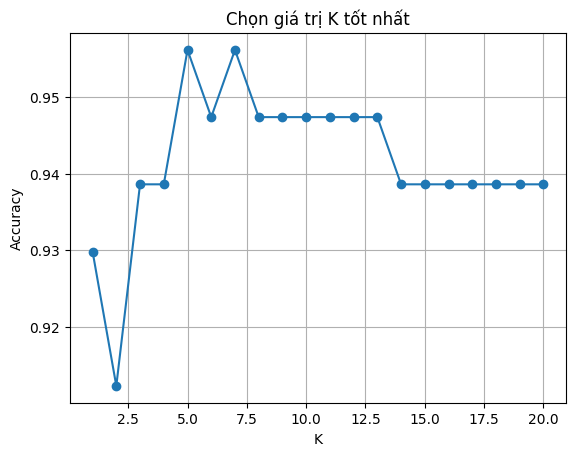

Giá trị K tốt nhất: 5
Độ chính xác: 0.956140350877193
Ma trận nhầm lẫn:
 [[71  1]
 [ 4 38]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Tìm giá trị K tốt nhất
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Vẽ biểu đồ chọn K
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Chọn giá trị K tốt nhất')
plt.grid()
plt.show()

# Huấn luyện mô hình với K tối ưu 
best_k = np.argmax(accuracies) + 1
print("Giá trị K tốt nhất:", best_k)

model = KNeighborsClassifier(n_neighbors=best_k)
# Thực chất không huấn luyện mà chỉ lưu lại giá trị K và bộ dữ liệu train
model.fit(X_train, y_train)
# Thực hiện test lại trên X_test
y_pred = model.predict(X_test)

# Kết quả
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))

### Đánh giá mô hình bằng đường ROC và AUC

AUC Score: 0.9816468253968255


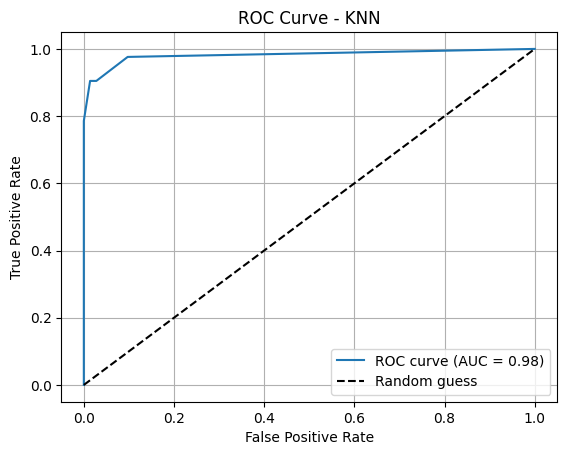

Số mẫu test: 114
Phân phối nhãn: Diagnosis
0    72
1    42
Name: count, dtype: int64


In [14]:
# Dự đoán xác suất cho lớp dương tính (ác tính)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

# Vẽ đường ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Số mẫu test:", len(y_test))
print("Phân phối nhãn:", y_test.value_counts())


### Ứng dụng

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
sample_indexes = X_test[:5]
sample_true_labels = y_test.iloc[:5]
predicted_labels = knn.predict(sample_indexes)

# 8. In kết quả
for i in range(5):
    print(f"Mẫu {i+1}:")
    print("  Dự đoán:", "Malignant" if predicted_labels[i] == 1 else "Benign")
    print("  Thực tế:", "Malignant" if sample_true_labels.iloc[i] == 1 else "Benign")

Mẫu 1:
  Dự đoán: Benign
  Thực tế: Benign
Mẫu 2:
  Dự đoán: Malignant
  Thực tế: Malignant
Mẫu 3:
  Dự đoán: Benign
  Thực tế: Benign
Mẫu 4:
  Dự đoán: Benign
  Thực tế: Malignant
Mẫu 5:
  Dự đoán: Benign
  Thực tế: Benign
